
<h4>Siamese Algorithm Approoach </h4>

In [133]:
import tensorflow as tf
from keras.applications.resnet import ResNet152 
import numpy as np
from PIL import Image
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

In [139]:
def euclidean_distance(vectors):
    features_A, features_B = vectors
    sum_squared = K.sum(K.square(features_A - features_B), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

def Siamese_Network(input_shape=(224, 224, 3)):
    input_1 = Input(shape=input_shape)
    input_2 = Input(shape=input_shape)
    base_model = ResNet152(include_top=False, weights='imagenet')
    left_features = base_model(input_1)
    right_features = base_model(input_2)

    distance = Lambda(euclidean_distance)([left_features, right_features])
    model = Model(inputs=[input_1, input_2], outputs=distance)

    return model

def convert_image_to_tensor(path):
    #img = image.load_img(path, target_size=(224, 224))
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    img=cv2.resize(img,(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img


siamese_model = Siamese_Network()

In [145]:
image_one = convert_image_to_tensor('red_1.jpg')
image_another = convert_image_to_tensor('red_2.jpg')
output = siamese_model.predict([image_one, image_another])
output=np.max(output[0][0])
print(output)

1/1 [==============================] - 0s 379ms/step
1.4322629


<h4> Hue Saturation Value Clustering </h4>

In [184]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os

def get_average_hsv(paths):
    players_together=pd.DataFrame(columns=['Image_name','h','s','v','clusters'])

    for indx,path in enumerate(paths): 

        image_1=cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2HSV)

        # Calculate the average value for each channel
        h, s, v = cv2.split(image_1)
        h_avg = np.mean(h)
        s_avg = np.mean(s)
        v_avg = np.mean(v)
        players_together.at[indx,'Image_name']=path
        players_together.at[indx,'h']=h_avg
        players_together.at[indx,'s']=s_avg
        #players_together.at[indx,'v']=v_avg

    
    data_np=players_together[['h','s']].to_numpy()
    clustering_model=KMeans(n_clusters=2).fit(data_np)
    cluster_op=clustering_model.predict(data_np)
    players_together['clusters']=cluster_op
    display(players_together)

all_images=[i for i in os.listdir(os.getcwd()) if '.jpg' in i]
get_average_hsv(all_images)



['red_1.jpg', 'red_2.jpg', 'red_3.jpg', 'red_4.jpg', 'red_6.jpg', 'red_7.jpg', 'red_8.jpg', 'red_9.jpg', 'white_1.jpg', 'white_2.jpg', 'white_3.jpg', 'white_4.jpg', 'white_5.jpg', 'white_6.jpg']


c:\Users\FM-PC-LT-233\anaconda3\envs\Fuse_Soccer_Attempt_Cuda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Image_name,h,s,v,clusters
0,red_1.jpg,41.602319,133.114736,NaN,1
1,red_2.jpg,47.476812,111.0,NaN,1
2,red_3.jpg,47.153296,111.581939,NaN,1
3,red_4.jpg,45.170156,126.188592,NaN,1
4,red_6.jpg,44.969703,117.694399,NaN,1
5,red_7.jpg,45.809783,118.11862,NaN,1
6,red_8.jpg,45.379538,125.829577,NaN,1
7,red_9.jpg,49.082807,111.009977,NaN,1
8,white_1.jpg,40.283323,120.14923,NaN,1
9,white_2.jpg,36.908018,103.982039,NaN,0


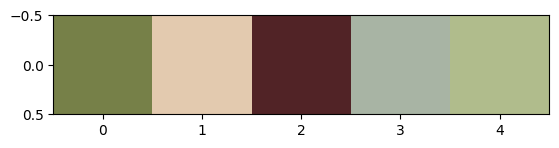

In [170]:
from colorthief import ColorThief
ct=ColorThief('red_7.jpg')
dominant_color=ct.get_color(quality=2)
plt.imshow([[dominant_color]])



palette=ct.get_palette(color_count=5)
plt.imshow([[palette[i] for i in range(5)]])
plt.show()

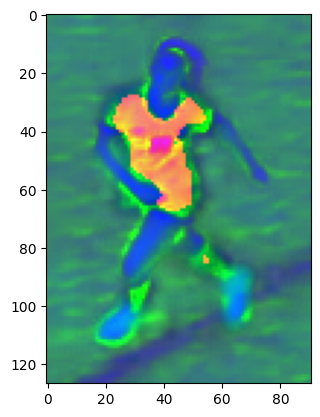

In [190]:
image_test=cv2.imread('red_1.jpg')
image=cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2HSV_FULL))